# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


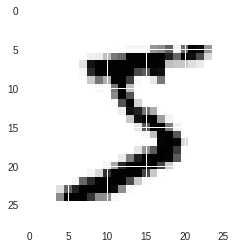

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 7, 1, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1, 7, activation='relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(SeparableConv2D(16, 3, 3, activation='relu'))
model.add(SeparableConv2D(16, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Convolution2D(10, 1))
model.add(GlobalAveragePooling2D())

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 22, 28, 32)        256       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 22, 22, 32)        7200      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 3, 3, 10)          170       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Image augumentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.5)


In [0]:

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [0]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=4000, epochs=10)

Epoch 1/10
4000/4000 [==============================] - 66s 17ms/step - loss: 1.2036 - acc: 0.6056
Epoch 2/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.7194 - acc: 0.7767
Epoch 3/10
4000/4000 [==============================] - 66s 16ms/step - loss: 0.5959 - acc: 0.8164
Epoch 4/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.5361 - acc: 0.8363
Epoch 5/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.4991 - acc: 0.8474
Epoch 6/10
4000/4000 [==============================] - 66s 16ms/step - loss: 0.4789 - acc: 0.8532
Epoch 7/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.4472 - acc: 0.8644
Epoch 8/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.4289 - acc: 0.8692
Epoch 9/10
4000/4000 [==============================] - 66s 16ms/step - loss: 0.4176 - acc: 0.8725
Epoch 10/10
4000/4000 [==============================] - 66s 17ms/step - loss: 0.4083 - acc: 0.8755


In [0]:
datagen = ImageDataGenerator(
    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )


datagen.fit(X_train)

In [0]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=5000, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.1176 - acc: 0.9671
Epoch 2/10
5000/5000 [==============================] - 80s 16ms/step - loss: 0.1037 - acc: 0.9707
Epoch 3/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0944 - acc: 0.9737
Epoch 4/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0912 - acc: 0.9745
Epoch 5/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0871 - acc: 0.9757
Epoch 6/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0852 - acc: 0.9766
Epoch 7/10
5000/5000 [==============================] - 80s 16ms/step - loss: 0.0808 - acc: 0.9775
Epoch 8/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0783 - acc: 0.9781
Epoch 9/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0785 - acc: 0.9782
Epoch 10/10
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0739 - acc: 0.9793


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  608/60000 [..............................] - ETA: 18s - loss: 0.0626 - acc: 0.9836

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 285us/step - loss: 0.0364 - acc: 0.9900
Epoch 2/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0251 - acc: 0.9925
Epoch 3/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0224 - acc: 0.9932
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0189 - acc: 0.9944
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0159 - acc: 0.9950
Epoch 6/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0158 - acc: 0.9953
Epoch 7/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0125 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0123 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0107 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0105 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03209842626014897, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.0828798e-11 1.5269646e-09 1.7417641e-09 2.6746820e-13 1.7495377e-10
  1.2160734e-19 8.6621278e-26 1.0000000e+00 1.5339916e-12 7.4293824e-09]
 [3.2615701e-06 6.4239005e-09 9.9992645e-01 6.6149880e-08 7.8978601e-06
  3.3648685e-12 1.1396457e-07 4.4434781e-10 6.2243467e-05 2.0009778e-09]
 [3.2562045e-07 9.9998188e-01 5.7393589e-08 5.1888225e-14 1.5775813e-05
  1.7526063e-09 9.3716147e-07 9.9705244e-07 7.9183549e-09 7.2736644e-10]
 [9.9999058e-01 3.0430207e-18 6.6621308e-10 9.4874338e-14 6.6533812e-10
  1.4670502e-10 5.2897691e-09 1.3147516e-18 3.5981975e-09 9.3556455e-06]
 [1.0948726e-21 2.6263997e-23 2.0759690e-20 1.1513855e-27 1.0000000e+00
  2.3046677e-18 4.0149292e-20 3.7986418e-24 1.2836526e-16 7.1002998e-10]
 [3.3391174e-08 9.9999738e-01 9.8085371e-09 4.3626716e-15 2.0496880e-06
  5.0669795e-11 7.9892843e-08 4.6239728e-07 5.1493287e-10 4.4208831e-10]
 [2.5927680e-27 9.4684233e-16 4.0584861e-23 2.2699603e-24 1.0000000e+00
  5.7491270e-19 5.6844130e-23 6.9764926e-16 2.2235333e-14 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

#Visualization

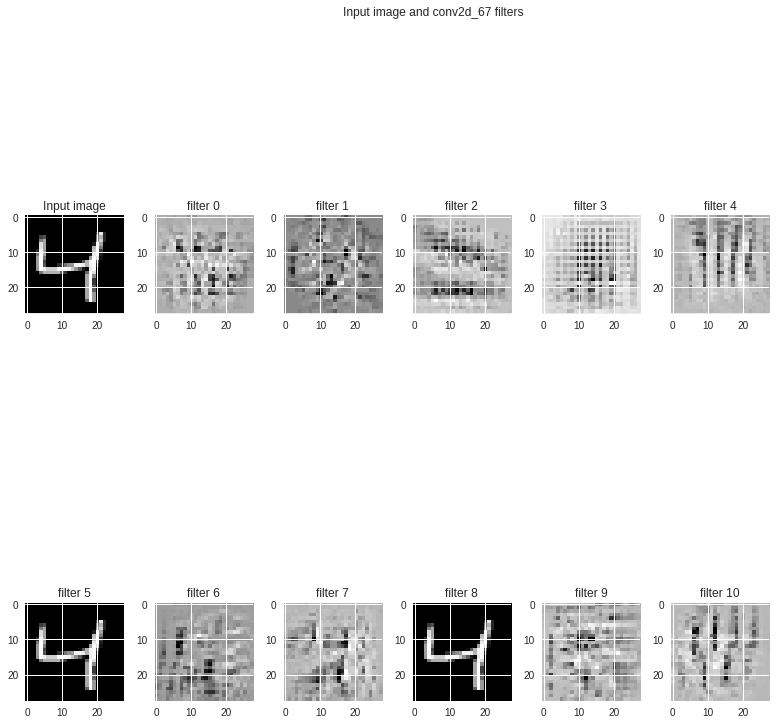

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_67'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()